In [4]:
import pandas as pd
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.factorplots import interaction_plot
import pingouin as pg

def unpivot(frame):
    N, K = frame.shape
    data = {
        "value": frame.to_numpy().ravel("F"),
        "variable": np.asarray(frame.columns).repeat(N),
        "gender": np.tile(np.asarray(frame.index), K),
    }
    return pd.DataFrame(data, columns=["gender", "variable", "value"])

Ho: Metodo = 0

H1: Metodo != 0


Ho: Sexo  = 0

H1: Sexo != 0


Ho: Sexo(Metodo) = 0

H1: Sexo(Metodo) != 0

In [5]:
file = "student.xlsx"
chicos = pd.read_excel(file, sheet_name = "chicos")
chicos["gender" ] = "chicos"
chicas = pd.read_excel(file, sheet_name = "chicas")
chicas["gender" ] = "chicas"

df = unpivot(pd.concat([chicas, chicos]).set_index("gender"))
df.head()

,gender,variable,value
0,chicas,m1,9
1,chicas,m1,7
2,chicas,m1,8
3,chicas,m1,8
4,chicas,m1,10


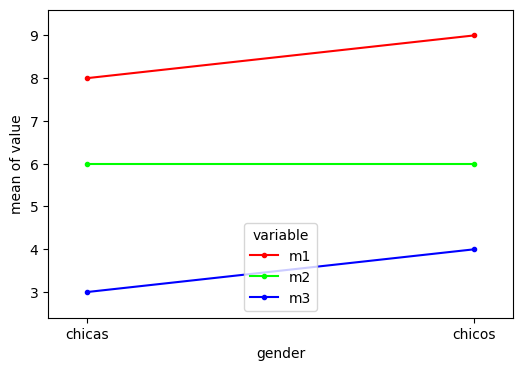

In [11]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = df.gender,
    trace    = df.variable,
    response = df.value,
    ax       = ax,
)

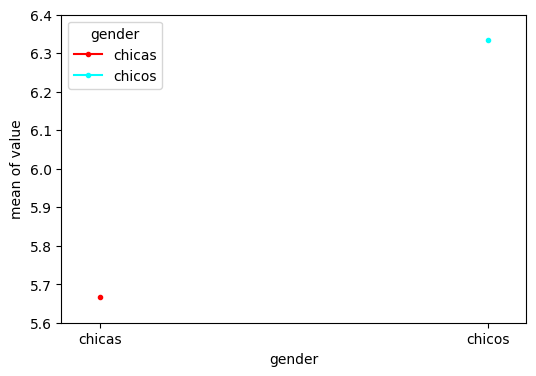

In [9]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = df.gender,
    trace    = df.gender,
    response = df.value,
    ax       = ax,
)

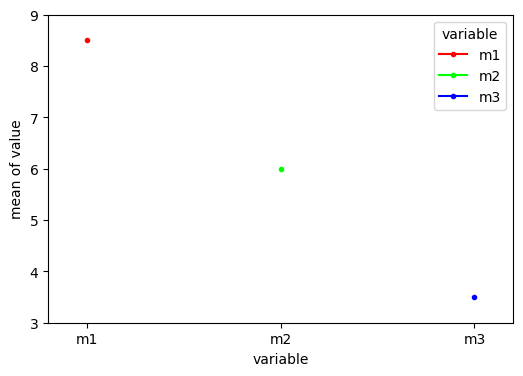

In [10]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = df.variable,
    trace    = df.variable,
    response = df.value,
    ax       = ax,
)

<AxesSubplot:title={'center':'value'}, xlabel='gender'>

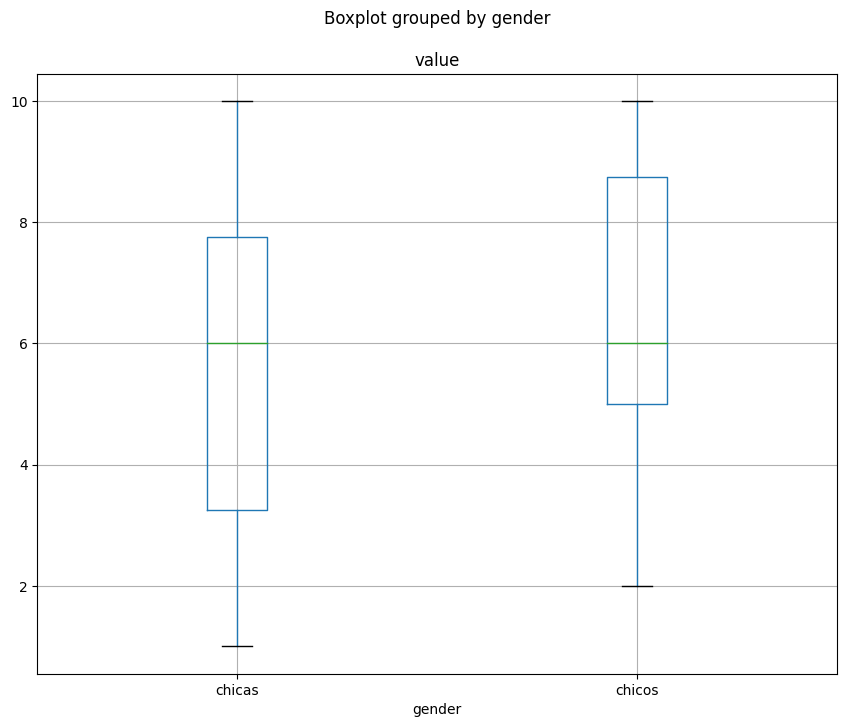

In [17]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10,8))
df.boxplot(column=['value'], by='gender', ax=ax)

<AxesSubplot:title={'center':'value'}, xlabel='variable'>

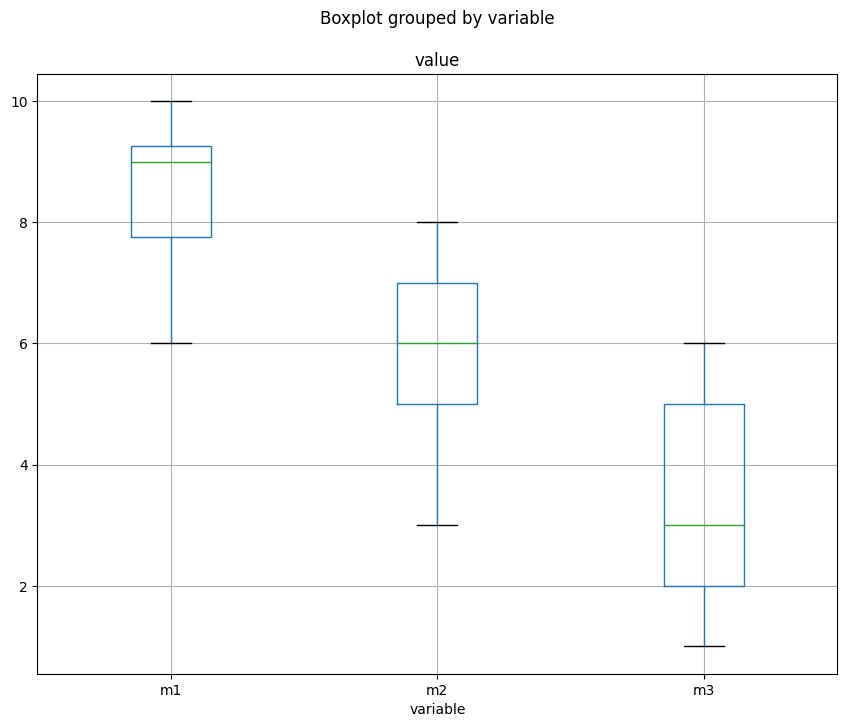

In [18]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10,8))
df.boxplot(column=['value'], by='variable', ax=ax)

In [7]:
pg.anova(
    data     = df,
    dv       = 'value',
    between  = ['gender', 'variable'],
    detailed = True
).round(4)

,Source,SS,DF,MS,F,p-unc,np2
0,gender,4.0,1,4.0000,1.7143,0.2004,0.0541
1,variable,150.0,2,75.0000,32.1429,0.0000,0.6818
2,gender * variable,2.0,2,1.0000,0.4286,0.6554,0.0278
3,Residual,70.0,30,2.3333,NaN,NaN,NaN


In [23]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['value'],
                          groups=df["gender"],
                          alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
chicas chicos   0.6667 0.4392 -1.0643 2.3976  False
---------------------------------------------------


In [24]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['value'],
                          groups=df["variable"],
                          alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    m1     m2     -2.5 0.0009 -4.0202 -0.9798   True
    m1     m3     -5.0    0.0 -6.5202 -3.4798   True
    m2     m3     -2.5 0.0009 -4.0202 -0.9798   True
----------------------------------------------------
